In [1]:
!rm -rf /content/Split_data

In [2]:
!unzip -q '/content/drive/MyDrive/INTERNSHIP_VIHARA/PROJECT2/Split_data.zip' -d /content/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [4]:
training_data_path =  '/content/Split_data/Train/Group_1'
validation_data_path = '/content/Split_data/Validation/Group_1'

In [5]:
os.listdir(training_data_path)

['Crispy Chicken', 'Baked Potato', 'Donut']

In [6]:
os.listdir(validation_data_path)

['Crispy Chicken', 'Baked Potato', 'Donut']

In [8]:
os.listdir(training_data_path+'/Crispy Chicken')

['Crispy Chicken-Train (630).jpeg',
 'Crispy Chicken-Train (280).jpeg',
 'Crispy Chicken-Train (1131).jpeg',
 'Crispy Chicken-Train (847).jpeg',
 'Crispy Chicken-Train (1264).jpeg',
 'Crispy Chicken-Train (671).jpeg',
 'Crispy Chicken-Train (81).jpeg',
 'Crispy Chicken-Train (148).jpeg',
 'Crispy Chicken-Train (662).jpeg',
 'Crispy Chicken-Train (878).jpeg',
 'Crispy Chicken-Train (694).jpeg',
 'Crispy Chicken-Train (473).jpeg',
 'Crispy Chicken-Train (834).jpeg',
 'Crispy Chicken-Train (1128).jpeg',
 'Crispy Chicken-Train (905).jpeg',
 'Crispy Chicken-Train (1467).jpeg',
 'Crispy Chicken-Train (339).jpeg',
 'Crispy Chicken-Train (1235).jpeg',
 'Crispy Chicken-Train (424).jpeg',
 'Crispy Chicken-Train (272).jpeg',
 'Crispy Chicken-Train (1002).jpeg',
 'Crispy Chicken-Train (1499).jpeg',
 'Crispy Chicken-Train (850).jpeg',
 'Crispy Chicken-Train (519).jpeg',
 'Crispy Chicken-Train (5).jpeg',
 'Crispy Chicken-Train (32).jpeg',
 'Crispy Chicken-Train (1138).jpeg',
 'Crispy Chicken-Train (

In [9]:
os.listdir(training_data_path+'/Baked Potato')

['Baked Potato-Train (672).jpeg',
 'Baked Potato-Train (1256).jpeg',
 'Baked Potato-Train (1403).jpeg',
 'Baked Potato-Train (254).jpeg',
 'Baked Potato-Train (1422).jpeg',
 'Baked Potato-Train (1280).jpeg',
 'Baked Potato-Train (508).jpeg',
 'Baked Potato-Train (1010).jpeg',
 'Baked Potato-Train (1288).jpeg',
 'Baked Potato-Train (1387).jpeg',
 'Baked Potato-Train (411).jpeg',
 'Baked Potato-Train (625).jpeg',
 'Baked Potato-Train (236).jpeg',
 'Baked Potato-Train (24).jpeg',
 'Baked Potato-Train (979).jpeg',
 'Baked Potato-Train (834).jpeg',
 'Baked Potato-Train (318).jpeg',
 'Baked Potato-Train (1214).jpeg',
 'Baked Potato-Train (553).jpeg',
 'Baked Potato-Train (1070).jpeg',
 'Baked Potato-Train (621).jpeg',
 'Baked Potato-Train (858).jpeg',
 'Baked Potato-Train (758).jpeg',
 'Baked Potato-Train (1205).jpeg',
 'Baked Potato-Train (615).jpeg',
 'Baked Potato-Train (1056).jpeg',
 'Baked Potato-Train (589).jpeg',
 'Baked Potato-Train (1414).jpeg',
 'Baked Potato-Train (1378).jpeg',
 '

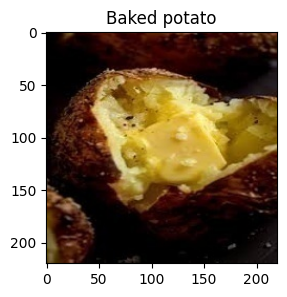

In [11]:
plt.figure(figsize=(5,3))
plt.title('Baked potato')
Baked_potato = plt.imread(training_data_path + '/Baked Potato/Baked Potato-Train (1043).jpeg')
plt.imshow(Baked_potato)
plt.show()

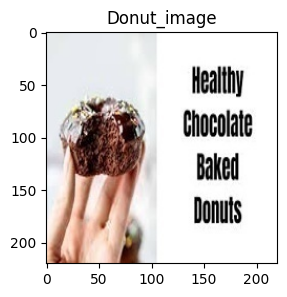

In [12]:
plt.figure(figsize=(5,3))
plt.title('Donut_image')
Donut = plt.imread(training_data_path + '/Donut/Donut (1051).jpeg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
group1_path = os.path.join(training_data_path)
labels = sorted([name for name in os.listdir(group1_path)
                 if os.path.isdir(os.path.join(group1_path, name))])
print("Group_1 Classes:", labels)


Group_1 Classes: ['Baked Potato', 'Crispy Chicken', 'Donut']


In [20]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [24]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid


In [26]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [30]:
num_classes = 3

model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(256,256,3)),
                     BatchNormalization(),
                     MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
                      Dropout(0.3),
    Dense(num_classes, activation='softmax')])

In [32]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871,875 (64.36 MB)

 Trainable params: 16,871,427 (64.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [35]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 529ms/step - accuracy: 0.6381 - loss: 1.2067 - val_accuracy: 0.4083 - val_loss: 1.3473
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.6913 - loss: 0.8925 - val_accuracy: 0.4417 - val_loss: 1.7140
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 452ms/step - accuracy: 0.6826 - loss: 0.7487 - val_accuracy: 0.4750 - val_loss: 2.4659
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.7755 - loss: 0.5648 - val_accuracy: 0.5333 - val_loss: 2.6649
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 457ms/step - accuracy: 0.8243 - loss: 0.4403 - val_accuracy: 0.5667 - val_loss: 2.6265
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.8283 - loss: 0.4328 - val_accuracy: 0.4750 - val_loss: 3.1659
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.7871 - loss: 0.6227 - val_accuracy: 0.5750 - val_loss: 3.1759
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 450ms/step - accuracy: 0.8018 - loss: 0.4967 - val_accuracy: 

**test_model**

In [36]:
import cv2

In [37]:
labels

['Baked Potato', 'Crispy Chicken', 'Donut']

In [38]:
train_input_data.class_indices

{'Baked Potato': 0, 'Crispy Chicken': 1, 'Donut': 2}

In [40]:
def fun(path):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load and preprocess the image
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # Predict using the model
    pred = model.predict(input_image)

    # Mapping only for Group_1 (train_input_data created from Group_1 folder)
    mapping = train_input_data.class_indices  # Automatically has only 3 classes
    inv_map = {v: k for k, v in mapping.items()}

    # Get predicted class index and label
    predicted_index = np.argmax(pred)
    predicted_label = inv_map[predicted_index]

    # Print for debugging
    print("Group_1 class mapping:", mapping)
    print("Model raw output:", pred)
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}")

    # Display image with prediction
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Group_1 class mapping: {'Baked Potato': 0, 'Crispy Chicken': 1, 'Donut': 2}
Model raw output: [[9.9978256e-01 3.1986430e-05 1.8541807e-04]]
Predicted class index: 0
Predicted label: Baked Potato


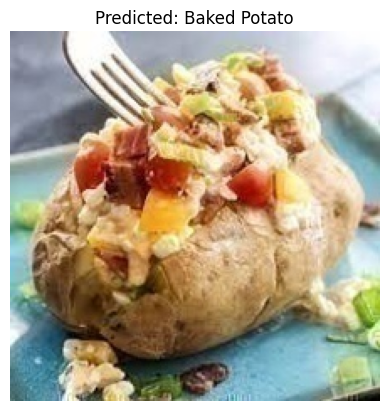

In [41]:
fun('/content/Baked Potato-Train (845).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Group_1 class mapping: {'Baked Potato': 0, 'Crispy Chicken': 1, 'Donut': 2}
Model raw output: [[5.6913559e-04 1.2899804e-03 9.9814093e-01]]
Predicted class index: 2
Predicted label: Donut


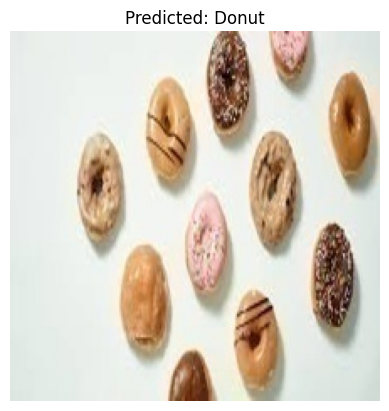

In [43]:
fun('/content/Donut (415).jpeg')

In [44]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [46]:
test_data_path = '/content/Split_data/Test/Group_1'

In [47]:
labels = ['Baked Potato', 'Crispy Chicken', 'Donut']


In [49]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [50]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [51]:
from sklearn.metrics import classification_report, accuracy_score

In [52]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [54]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))

Classification Report:

                precision    recall  f1-score   support

  Baked Potato       0.68      0.70      0.69        40
Crispy Chicken       0.71      0.72      0.72        40
         Donut       0.79      0.75      0.77        40

      accuracy                           0.72       120
     macro avg       0.73      0.72      0.73       120
  weighted avg       0.73      0.72      0.73       120



In [56]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7250


In [58]:
model.save('/content/train_group1.h5')
print("Model saved successfully at /content/custom_food_model.h5")

Model saved successfully at /content/custom_food_model.h5


In [59]:
from tensorflow.keras.models import load_model
model = load_model('/content/train_group1.h5')
